In [65]:
#import package
from cobra import Model, Reaction, Metabolite
import cobra
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
from cobra.util.solver import linear_reaction_coefficients
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn import datasets


In [84]:
MET_Species=pd.read_csv('Metadata_Species.csv',header=None)
#MET_Species=pd.DataFrame(MET_Species, columns = ["Strain","Species"])
MET_Species.columns=["Strain","Species"]
MET_Species
MET_Species=MET_Species.set_index("Strain")
MET_Species

,Species
Strain,
1303.820,Streptococcus oralis
1077464.260,Streptococcus tigurinus
1303.780,Streptococcus oralis
1077464.320,Streptococcus tigurinus
1891914.150,Streptococcus oralis
1095740.300,Streptococcus oralis
1303.700,Streptococcus oralis
1303.900,Streptococcus oralis
1891914.500,Streptococcus oralis


In [85]:

MET_Disease=pd.read_csv('Metadata_Disease.csv')
MET_Disease=MET_Disease.set_index("Strain")
Matrix=pd.read_csv('Matrix.csv')
MET_Test_unk=pd.read_csv('1077464.24_testfile.csv', header=None)
MET_Test1=pd.read_csv('1333865.3]_testfile.csv', header=None)

MET_Test2=pd.read_csv('1303.71_testfile.csv', header=None)

MET_Species

,Species
Strain,
1303.820,Streptococcus oralis
1077464.260,Streptococcus tigurinus
1303.780,Streptococcus oralis
1077464.320,Streptococcus tigurinus
1891914.150,Streptococcus oralis
1095740.300,Streptococcus oralis
1303.700,Streptococcus oralis
1303.900,Streptococcus oralis
1891914.500,Streptococcus oralis


In [5]:
MET_Disease.index
mettest=MET_Test_unk.T
mettest1=MET_Test1.T
mettest2=MET_Test2.T
mettest.shape
MET_Species.columns

Index([u'Strain', u'Species'], dtype='object')

In [8]:
genelist=[str(item) for item in Matrix.columns.values]


In [9]:
Met_Species=MET_Species.as_matrix
Met_Disease=MET_Disease.as_matrix
Met_Disease
data_target=['Commensal', 'Endocarditis']
data_feaures=[str(item) for item in genelist]

In [10]:
Matrix

,psaA,nanA,cba,pavA,pavB/pfbB,slrA,zmpB,htrA/degP,piuA,cps2E,...,SPH_0460,pblA,clpE,STER_1222,SPH_0461,psrP,abpB,inlK,cps4K,pfbA
0,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)

In [88]:
import graphviz 
exp= tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(exp) 
graph.render("output") 

'output.pdf'

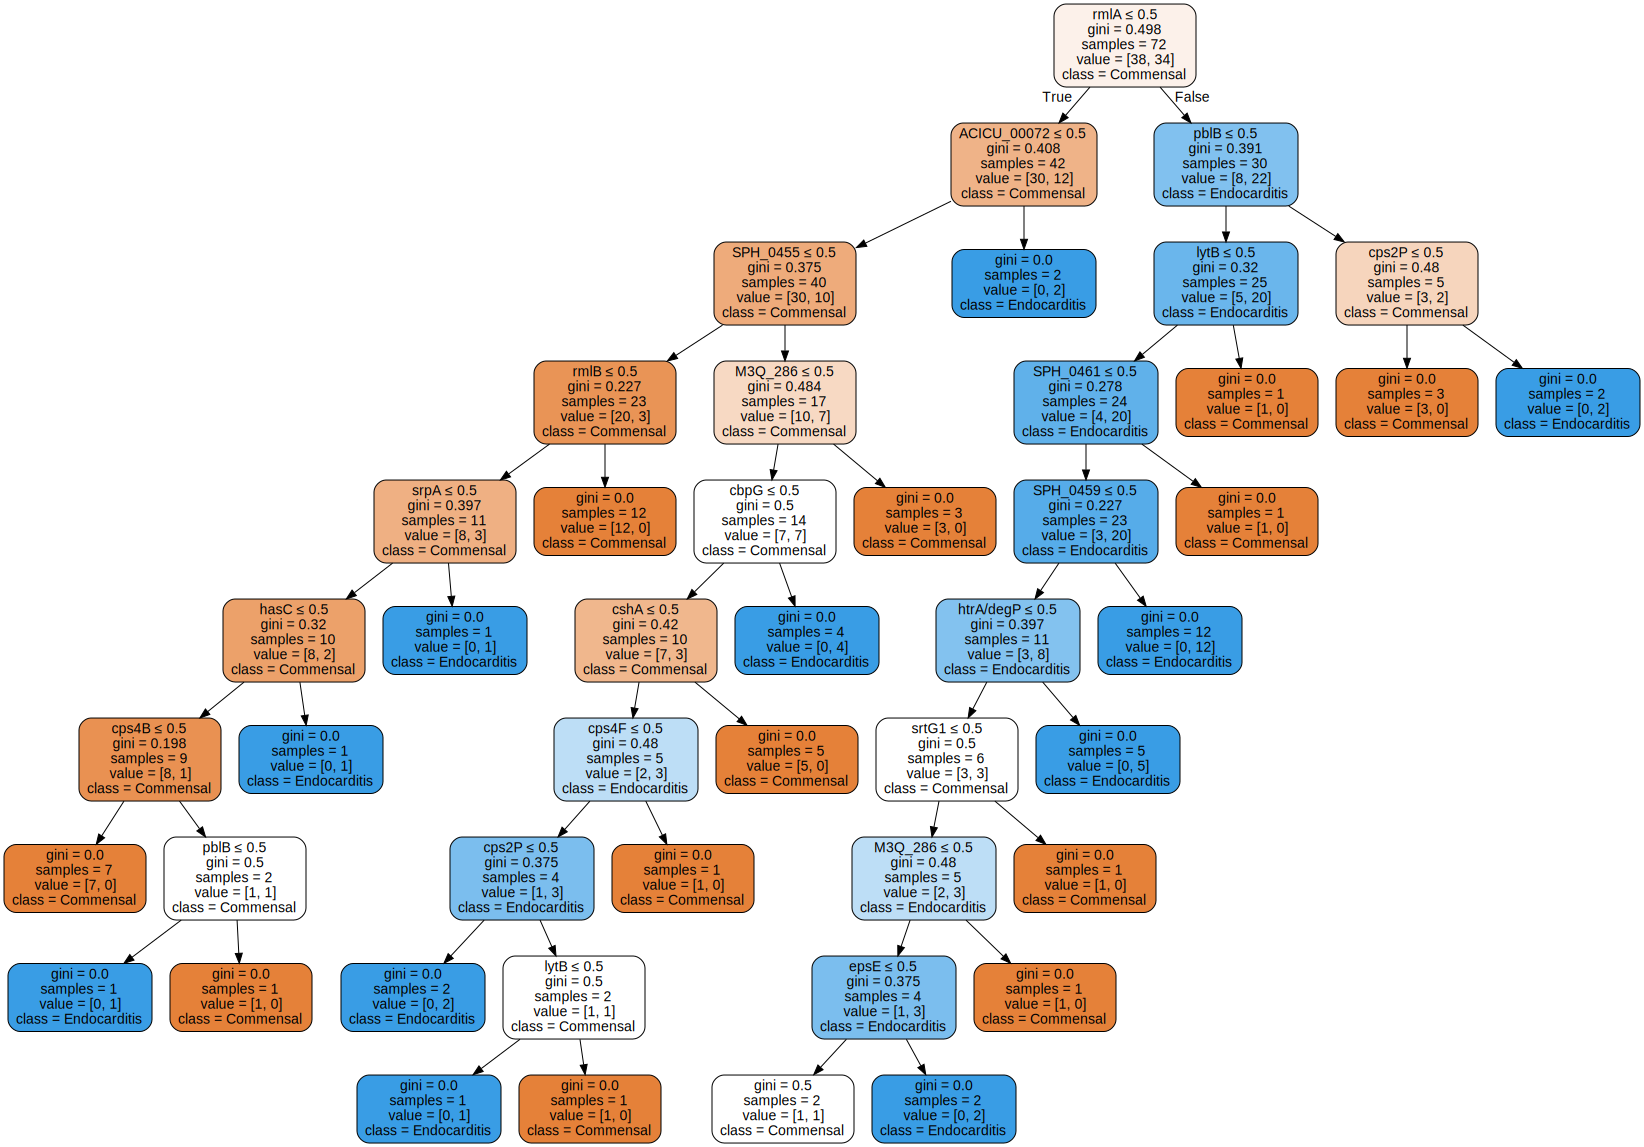

In [89]:
clf= tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_feaures,  
                         class_names=data_target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = graphviz.Source(clf)  
graph2.render("Disease Decision Tree")
graph2

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest])

array(['Endocarditis'], dtype=object)

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest1])

array(['Endocarditis'], dtype=object)

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest2])

array(['Endocarditis'], dtype=object)

In [98]:
MET_Species

,Species
Strain,
1303.820,Streptococcus oralis
1077464.260,Streptococcus tigurinus
1303.780,Streptococcus oralis
1077464.320,Streptococcus tigurinus
1891914.150,Streptococcus oralis
1095740.300,Streptococcus oralis
1303.700,Streptococcus oralis
1303.900,Streptococcus oralis
1891914.500,Streptococcus oralis


In [107]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
p=str(clf.predict([mettest]))
#print p
MET_Disease.columns

Index([u'Type'], dtype='object')

In [108]:
i=1
strain=MET_Disease.index[0]
Type=MET_Disease.iloc[i]['Type']
print 'Strain: %s , Type: %s , Labeled: %s' % (strain,Type,p)

Strain: 1303.82 , Type: Endocarditis , Labeled: ['Endocarditis']


In [109]:
#MATCHED WITH METADATA


mat=[]
c1=0
c2=0
for i in range(len(Matrix)):
    mat=Matrix.loc[i]
    strain=MET_Disease.index[i]
    Type=MET_Disease.iloc[i]['Type']
    p=str(clf.predict([mat]))
    c1+=1
    if p==str(Type):
        Q='Did not match \n'
        c2+=1
        print Q
    print 'Strain: %s, Type: %s , Labeled: %s' % (strain,Type,p)
print (c1,c2)

   

Strain: 1303.82, Type: Commensal , Labeled: ['Commensal']
Strain: 1077464.26, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1303.78, Type: Commensal , Labeled: ['Commensal']
Strain: 1077464.32, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1891914.15, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1095740.3, Type: Commensal , Labeled: ['Commensal']
Strain: 1303.7, Type: Commensal , Labeled: ['Commensal']
Strain: 1303.9, Type: Commensal , Labeled: ['Commensal']
Strain: 1891914.5, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1458253.8, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1458253.7, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1891914.8, Type: Endocarditis , Labeled: ['Endocarditis']
Strain: 1303.85, Type: Commensal , Labeled: ['Commensal']
Strain: 1303.88, Type: Endocarditis , Labeled: ['Commensal']
Strain: 1303.77, Type: Commensal , Labeled: ['Commensal']
Strain: 655813.4, Type: Commensal , Labeled: ['Commensal']
Strain: 1

In [115]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Species)

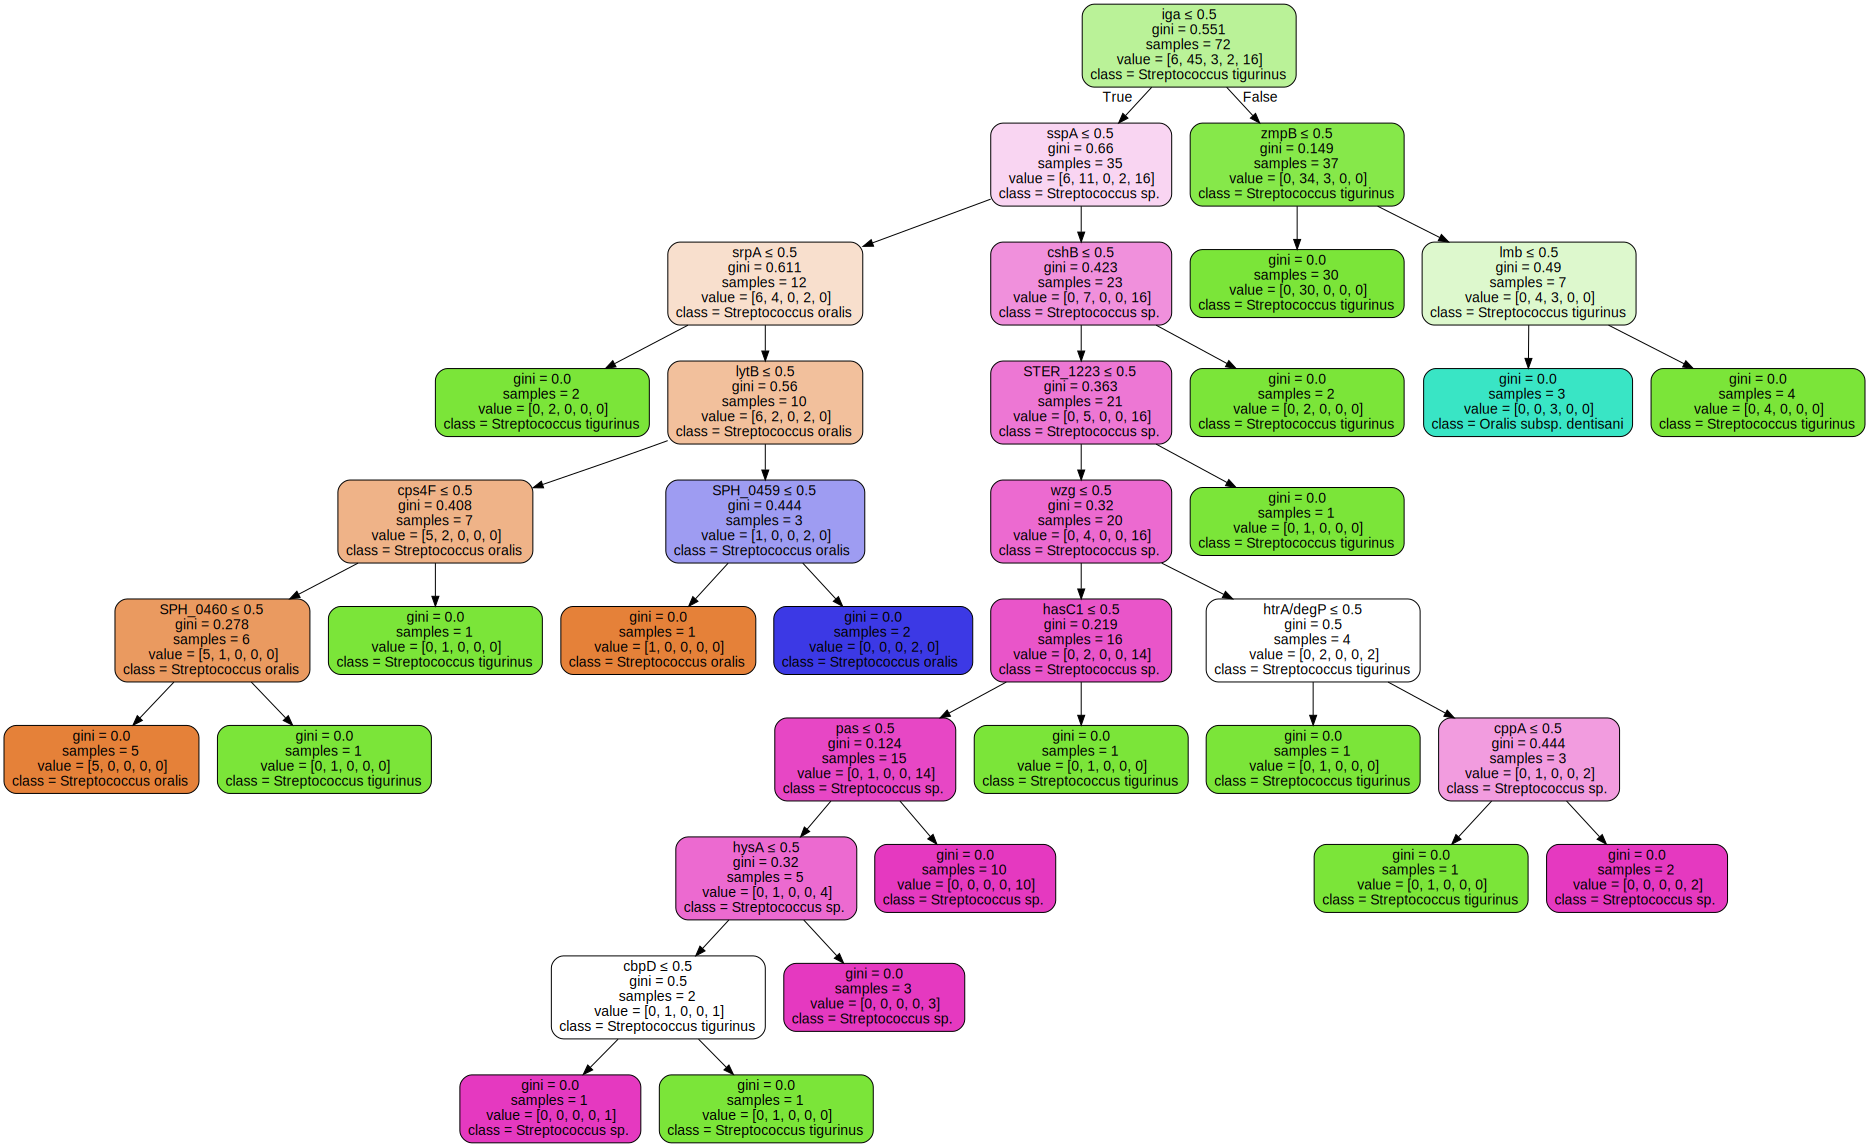

In [116]:
clf= tree.export_graphviz(clf, out_file=None,
                         feature_names=data_feaures,  
                         class_names=['Streptococcus oralis','Streptococcus tigurinus','Oralis subsp. dentisani','Streptococcus oralis ','Streptococcus sp.'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph3 = graphviz.Source(clf)  
graph3.render("Species Decsion Tree")
graph3

In [113]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Species)

In [114]:
#MATCHED WITH METADATA


met=[]
c1=0
c2=0
for i in range(len(Matrix)):
    met=Matrix.loc[i]
    strain=MET_Species.index[i]
    Type=MET_Species.iloc[i]['Species']
    p=str(clf.predict([met]))
    c1+=1
    if p==str(Type):
        Q='Did not match \n'
        c2+=1
        print Q
    print 'Strain: %s, Type: %s , Labeled: %s' % (strain,Type,p)
print (c1,c2)


Strain: 1303.82, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1077464.26, Type: Streptococcus tigurinus  , Labeled: ['Streptococcus tigurinus ']
Strain: 1303.78, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1077464.32, Type: Streptococcus tigurinus  , Labeled: ['Streptococcus tigurinus ']
Strain: 1891914.15, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1095740.3, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1303.7, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1303.9, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1891914.5, Type: Streptococcus oralis , Labeled: ['Streptococcus oralis']
Strain: 1458253.8, Type: Oralis subsp. dentisani , Labeled: ['Oralis subsp. dentisani']
Strain: 1458253.7, Type: Oralis subsp. dentisani , Labeled: ['Oralis subsp. dentisani']
Strain: 1891914.8, Type: Streptococcus oralis , Labeled: ['Streptococcus oral

In [ ]:
MET_Disease

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
iris.target_names

len(iris.target)
iris.data

In [ ]:
iris.feature_names